**1. Conversion entre les espaces de couleurs**

Vous allez travailler avec différentes images pour les convertir entre plusieurs espaces de couleurs et afficher leurs histogrammes.

a) Lecture des images avec OpenCV :

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Chemins vers les images
image_paths = [
'/content/drive/MyDrive/iamge/oiseau.jpg',
'/content/drive/MyDrive/iamge/enfant.jpg']

b) Conversion des Espaces de Couleurs avec RGB, HSV, et Lab :

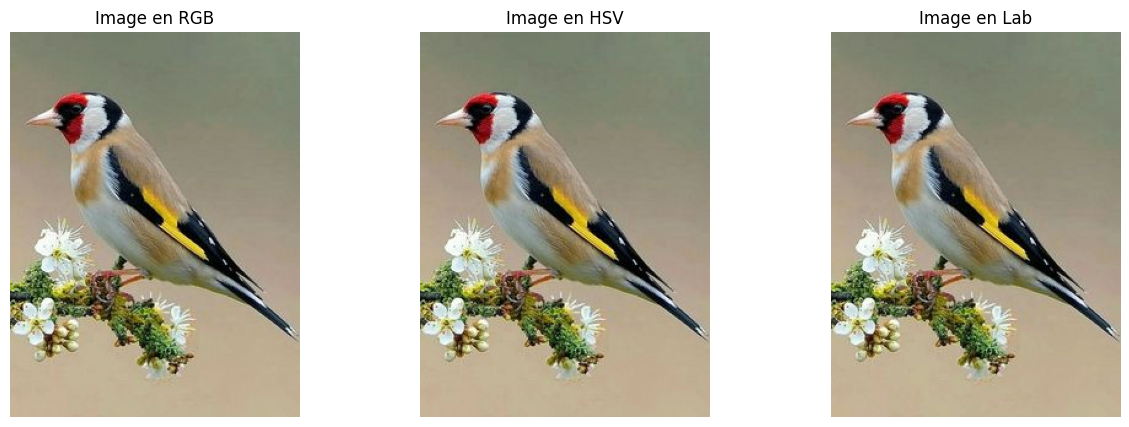

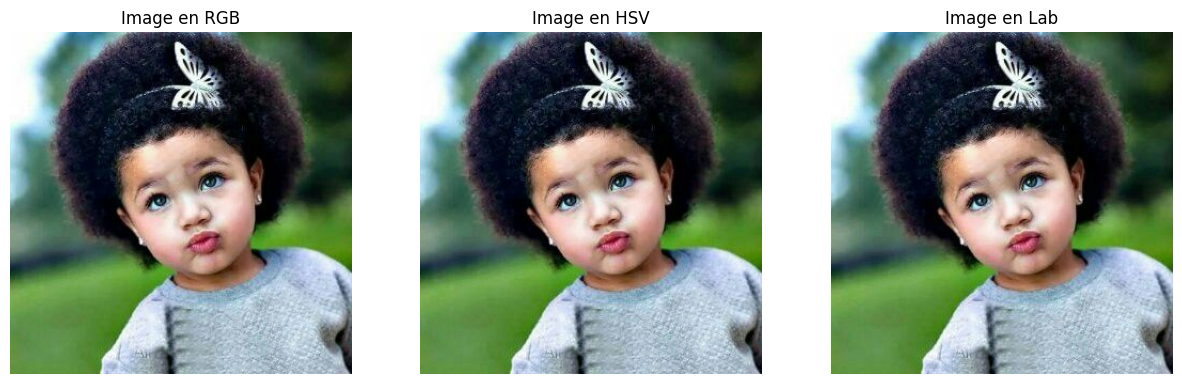

In [ ]:
# Conversion RGB (par défaut en OpenCV)
for image_path in image_paths:
  image = cv2.imread(image_path) # Changed image_paths to image_path to read individual image paths.
  #rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Conversion HSV
  #hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Conversion Lab
  #lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
  # Conversion RGB (par défaut en OpenCV)




  # Conversion en RGB
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Conversion en HSV
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Conversion en Lab
  lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

  # Affichage des images dans les différents espaces de couleurs
  plt.figure(figsize=(15, 5))

  # Afficher l'image en RGB
  plt.subplot(1, 3, 1)
  plt.imshow(rgb_image)
  plt.title('Image en RGB')
  plt.axis('off')

  # Afficher l'image en HSV
  plt.subplot(1, 3, 2)
  plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
  plt.title('Image en HSV')
  plt.axis('off')

  # Afficher l'image en Lab
  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB))
  plt.title('Image en Lab')
  plt.axis('off')

  # Afficher les images côte à côte
  plt.show()

c) Affichage de l'Image et de l'Histogramme pour chaque composante des espaces de couleurs :

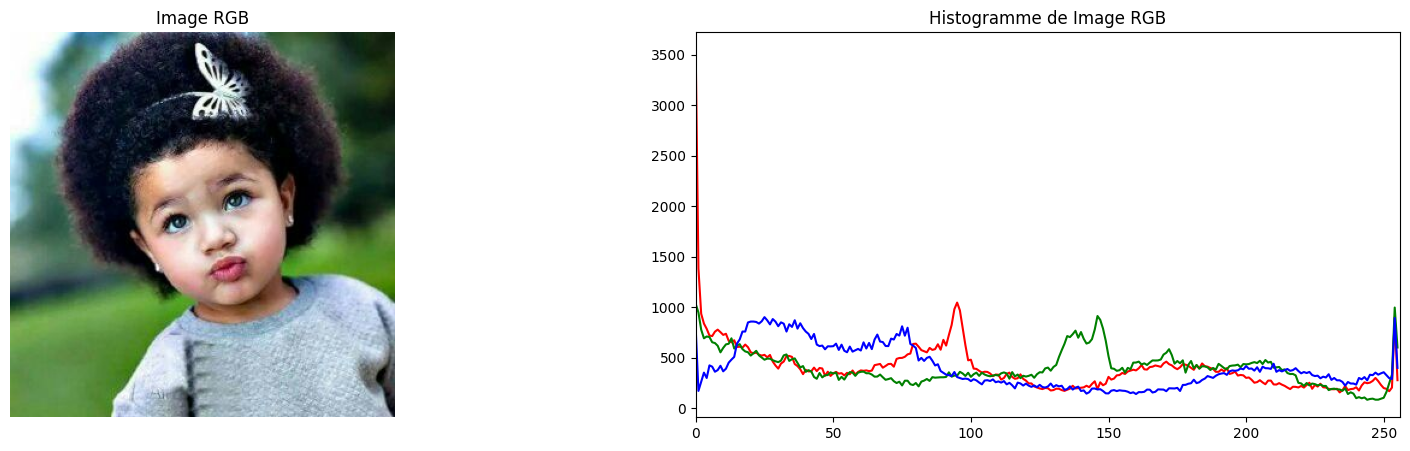

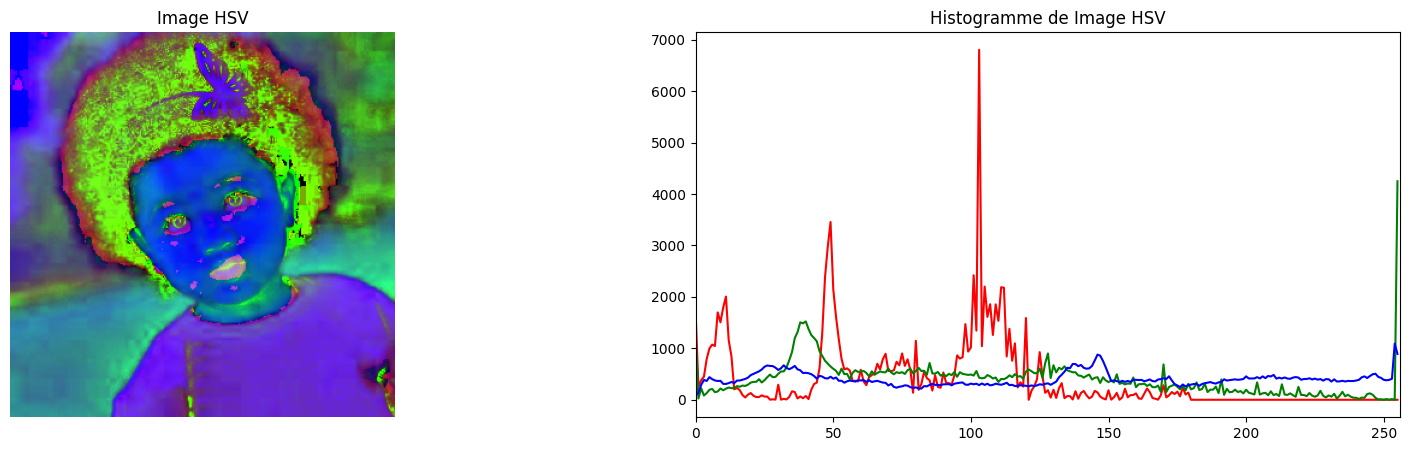

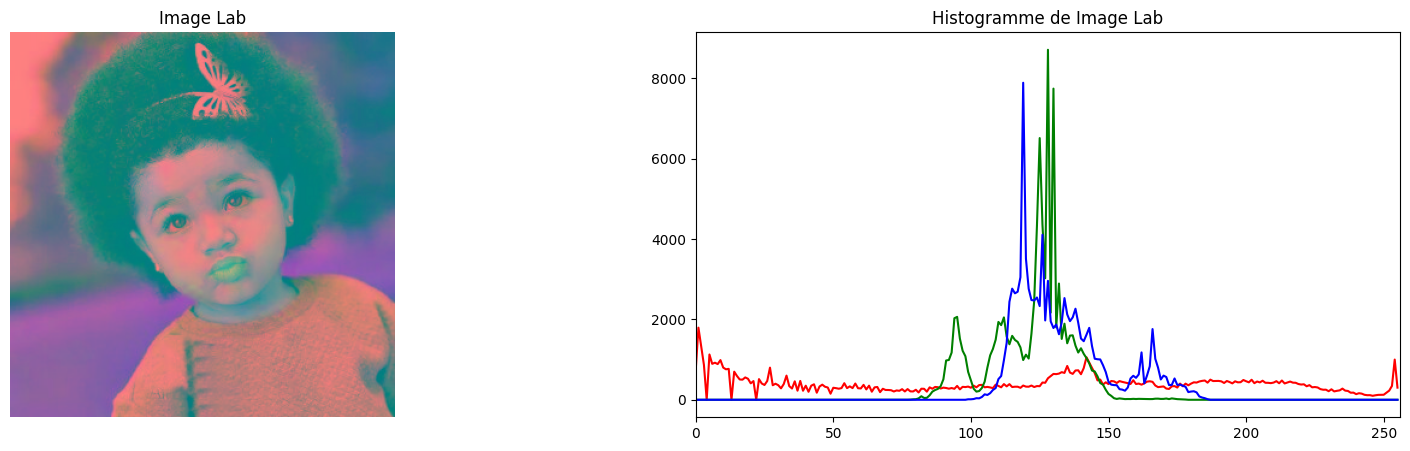

In [ ]:
def plot_image_and_histogram(image, title):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
    plt.title(f'Histogramme de {title}')
    plt.xlim([0, 256])
    plt.show()

# Pour chaque espace de couleur
plot_image_and_histogram(rgb_image, 'Image RGB')
plot_image_and_histogram(hsv_image, 'Image HSV')
plot_image_and_histogram(lab_image, 'Image Lab')


3. Correction du Contraste de l'image selon différentes méthodes et espaces de couleurs.

a) Correction dans l'Espace RGB avec l'égalisation d'histogramme pour chaque composante RGB :

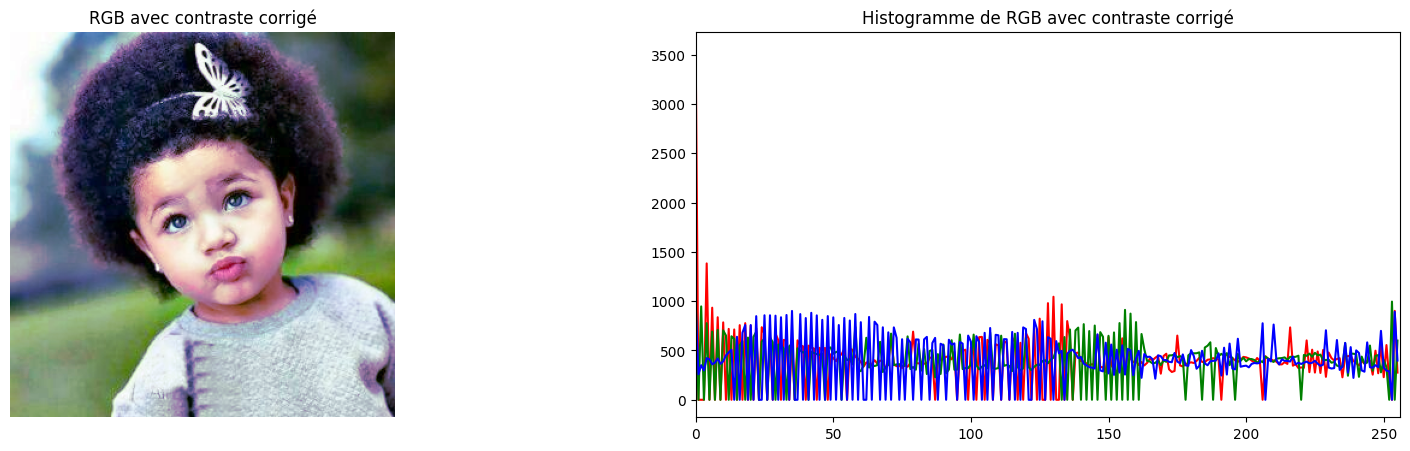

In [ ]:
import cv2
from matplotlib import pyplot as plt

def equalize_rgb(image):
    r, g, b = cv2.split(image)
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)
    return cv2.merge([r_eq, g_eq, b_eq])

def plot_image_and_histogram(image, title): # This function is defined within the same scope
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
    plt.title(f'Histogramme de {title}')
    plt.xlim([0, 256])
    plt.show()

rgb_eq = equalize_rgb(rgb_image)
plot_image_and_histogram(rgb_eq, 'RGB avec contraste corrigé')


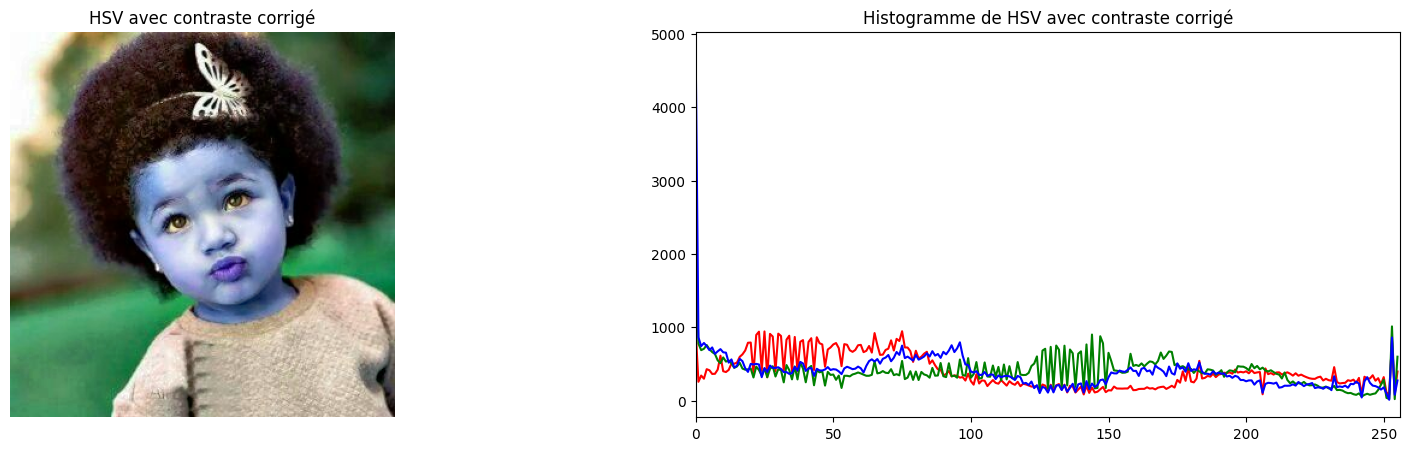

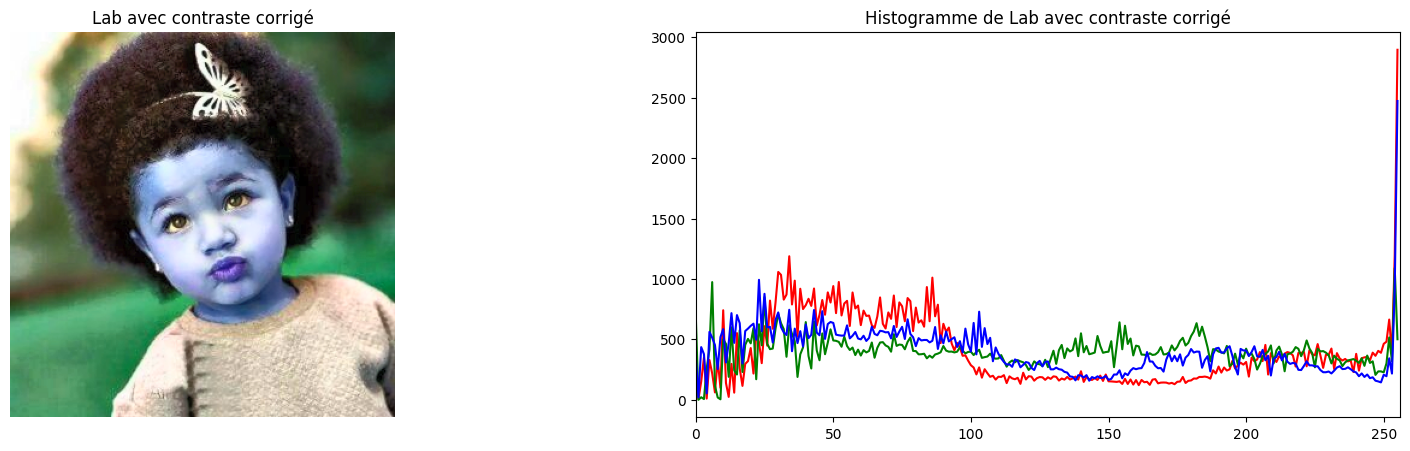

In [ ]:
# Correction dans l'espace HSV
h, s, v = cv2.split(hsv_image)
v_eq = cv2.equalizeHist(v)
hsv_eq = cv2.merge([h, s, v_eq])
hsv_eq_bgr = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2BGR)
plot_image_and_histogram(hsv_eq_bgr, 'HSV avec contraste corrigé')

# Correction dans l'espace Lab
l, a, b = cv2.split(lab_image)
l_eq = cv2.equalizeHist(l)
lab_eq = cv2.merge([l_eq, a, b])
lab_eq_bgr = cv2.cvtColor(lab_eq, cv2.COLOR_Lab2BGR)
plot_image_and_histogram(lab_eq_bgr, 'Lab avec contraste corrigé')
